# Drills - Similarity Models

## Challenge: Model Comparison



by: Melissa N 

Data: [Weather Data - Boston (Jul 2012 - Aug 2015)](https://www.kaggle.com/naveenpandianv/weather-data-boston-jul-2012-aug-2015/data)

In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('weatherdata.csv')
display(df.head()) #Not using Print statement so that it displays all in one line for all tables 

,precipitation,day,month,year,temperature,dewpoint,humidity,wind
0,1.000,1,8,2015,79,58,50,10
1,0.000,2,8,2015,78,54,52,11
2,0.000,3,8,2015,79,64,67,13
3,0.490,4,8,2015,78,66,68,9
4,0.000,5,8,2015,75,57,58,11


This data contains information on precipiation, temperature,dewpoint,humidity and wind  for the city of Boston from 2012 to 2013 per month.   

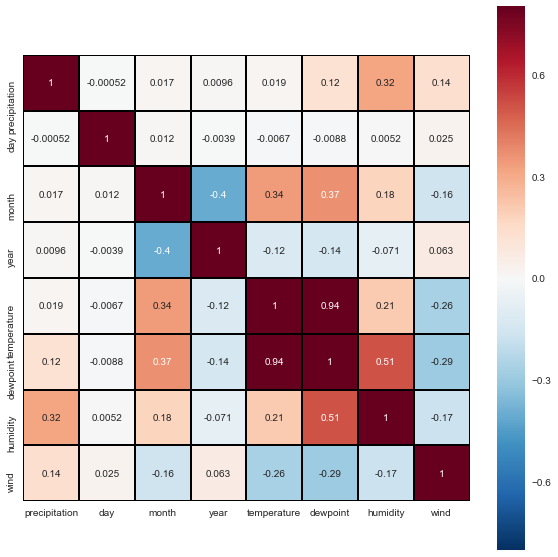

In [3]:
df_correlation_matrix = df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(df_correlation_matrix, vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)

Suppose we want to be able to predict when there will be a precipitaion.   

Since I want my outcome to be precipitaion.   
I will have to look at the features that have a strong correlation with precipitation and choose those ones to use.   

Looking at the correlation matrix above,   
the only 3 that seem to have a strong correlation with precipitaion are temperature, humidity and wind.   


The correlation between temperature and and precipitation is 0.019.    
The correlation between dewpoint and precipitation is 0.12.    
The correlation between humidity and precipitation is 0.32.   
The correlation between wind and and precipitation is 0.14. 

That is because dewpoint is a fuction of humidity  and temperature.

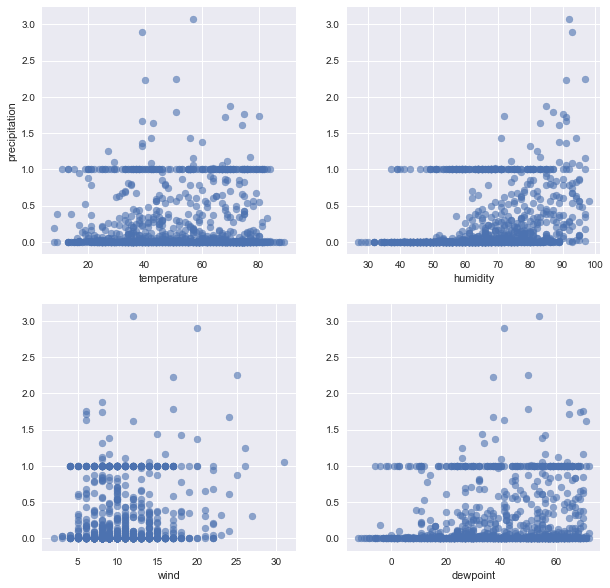

In [4]:
# Look at the scatter plot for precipitation related to dewpoint, humidity and wind..


plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.scatter(df['temperature'], df['precipitation'], alpha=0.6)
plt.xlabel('temperature')
plt.ylabel('precipitation')

plt.subplot(2, 2, 2)

plt.scatter(df['humidity'], df['precipitation'], alpha=0.6)
plt.xlabel('humidity')

plt.subplot(2, 2, 3)

plt.scatter(df['wind'], df['precipitation'], alpha=0.6)
plt.xlabel('wind')


plt.subplot(2, 2, 4)

plt.scatter(df['dewpoint'], df['precipitation'], alpha=0.6)
plt.xlabel('dewpoint')

plt.show()


Here we see that there is a __class imbalance__ in the data because we see a lot of 1 and 0.   
So we need to do some data normalization on our data.

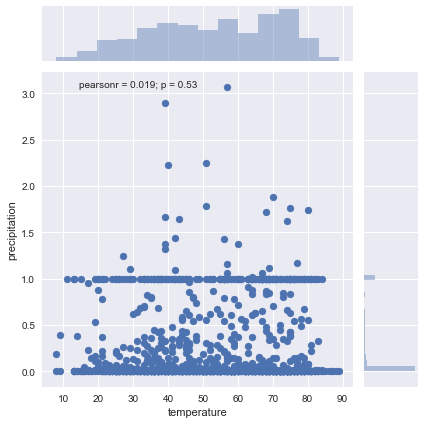

In [5]:
plt.figure(figsize=(5, 5))
sns.jointplot(x='temperature',y='precipitation',data=df)
plt.show()

temperature is pretty normally distributed

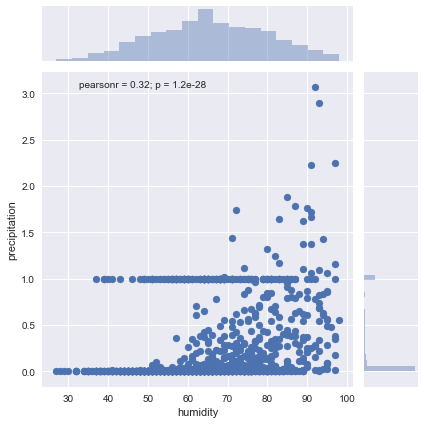

In [6]:
plt.figure(figsize=(5, 5))
sns.jointplot(x='humidity',y='precipitation',data=df)
plt.show()

We can see that humidity is normaly distributed

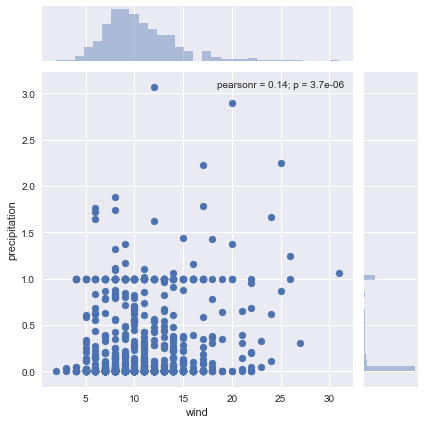

In [7]:
plt.figure(figsize=(5, 5))
sns.jointplot(x='wind',y='precipitation',data=df)
plt.show()

we see that wind is skewed to the left.

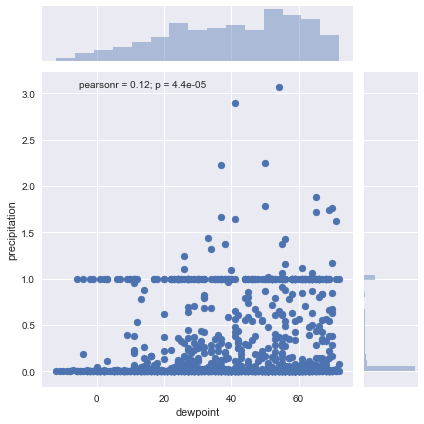

In [8]:
plt.figure(figsize=(5, 5))
sns.jointplot(x='dewpoint',y='precipitation',data=df)
plt.show()

we see that wind is skewed to the right.

Look into==>

Class imbalance because we see a lot of 1 and 0 
So we need to do some data normalization. 

Do this with the Log of precipitation as Y or outcoume

### Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

### KNN REGRESSION

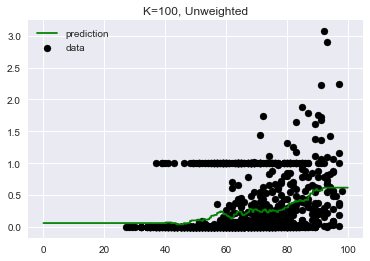

Unweighted Accuracy: 0.10 (+/- 0.06)


In [9]:
from sklearn import neighbors

# Build our model with X = df['humidity'] and Y = df['precipitation'].
knn = neighbors.KNeighborsRegressor(n_neighbors=100)
X = pd.DataFrame(df.humidity)
Y = df.precipitation
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 100, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)


plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=100, Unweighted')
plt.show()



score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

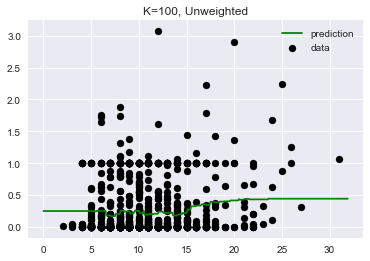

Unweighted Accuracy: 0.01 (+/- 0.05)


In [10]:
# Build our model with X = df['wind'] and Y = df['precipitation'].
knn = neighbors.KNeighborsRegressor(n_neighbors=100)
X = pd.DataFrame(df.wind)
Y = df.precipitation
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 32, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)


plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=100, Unweighted')
plt.show()



score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

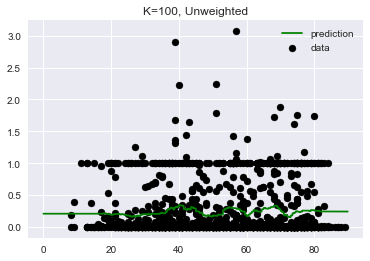

Unweighted Accuracy: -0.01 (+/- 0.02)


In [11]:

# Build our model with X = df['temperature'] and Y = df['precipitation'].
knn = neighbors.KNeighborsRegressor(n_neighbors=100)
X = pd.DataFrame(df.temperature)
Y = df.precipitation
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 90, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)


plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=100, Unweighted')
plt.show()



score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

#### KNN REGRESSION using X1 = df[['temperature','humidity','wind']]

In [12]:
# Build our model without weights
knn1 = neighbors.KNeighborsRegressor(n_neighbors=100)
X1 = df[['temperature','humidity','wind']]
Y1 = df['precipitation']
knn1.fit(X1, Y1)

print('\nR-squared:')
print(knn1.score(X1, Y1))

score1 = cross_val_score(knn1, X1, Y1, cv=5)
print("\nUnweighted Accuracy: %0.2f (+/- %0.2f)" % (score1.mean(), score1.std() * 2))

print('\nEach Cross Validated R^2 Score: \n', score1)


R-squared:
0.119485598276

Unweighted Accuracy: 0.09 (+/- 0.05)

Each Cross Validated R^2 Score: 
 [ 0.11001745  0.12597676  0.08251585  0.06844458  0.07129007]


The R-squared is not good.   
But for the cross validation we can see that the data is predicting well on itself.  

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


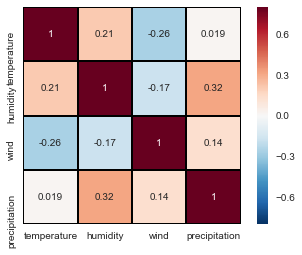

In [13]:
X1['precipitation'] = Y1
X1_correlation_matrix = X1.corr()
sns.heatmap(X1_correlation_matrix, vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)

The correlation between temperature and and precipitation is 0.019.      
The correlation between humidity and precipitation is 0.32.   
The correlation between wind and and precipitation is 0.14. 

#### KNN Regression with weight

In [14]:
# Run the same model, this time with weights.
knn_w1 = neighbors.KNeighborsRegressor(n_neighbors=100, weights='distance')
X1_w = df[['temperature','humidity','wind']]
Y1 = df['precipitation']
knn_w1.fit(X1_w, Y1)

print('\nR-squared:')
print(knn_w1.score(X1_w, Y1))

score_w1 = cross_val_score(knn_w1, X1_w, Y1, cv=5)
print("\nWeighted Accuracy: %0.2f (+/- %0.2f)" % (score_w1.mean(), score_w1.std() * 2))

print('\nEach Cross Validated R^2 Score: \n', score_w1)


R-squared:
0.991479899256

Weighted Accuracy: 0.10 (+/- 0.07)

Each Cross Validated R^2 Score: 
 [ 0.09099499  0.1561475   0.08796026  0.04276341  0.10900265]


The R-squared  good.   
But for the cross validation we can see that the data is predicting well on itself.  

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


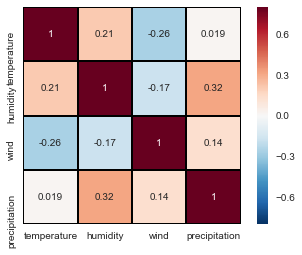

In [15]:
X1_w['precipitation'] = Y1
X1_w_correlation_matrix = X1_w.corr()
sns.heatmap(X1_correlation_matrix, vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)

The correlation between temperature  and precipitation is 0.019.      
The correlation between humidity and precipitation is 0.32.   
The correlation between wind  and precipitation is 0.14. 

### OLS REGRESSION 

In [16]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['precipitation'].values.reshape(-1, 1)
X = df[['temperature','humidity','wind']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))



print('\nEach Cross Validated R^2 Score: \n',cross_val_score(regr, Y, X, cv=5))


Coefficients: 
 [[ -8.50968198e-05   1.02255281e-02   2.18277131e-02]]

Intercept: 
 [-0.65631098]

R-squared:
0.13894940026

Each Cross Validated R^2 Score: 
 [ 0.03084307 -0.0417748  -0.50041325 -0.12556709  0.00604264]


The R-squared is not good.   
But for the cross validation we can see that the data is not predicting well on itself.  

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


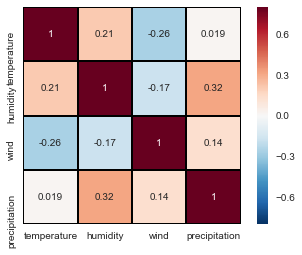

In [17]:
X['precipitation'] = Y
X_correlation_matrix = X.corr()
sns.heatmap(X_correlation_matrix, vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)

The correlation between temperature and precipitation is 0.019.      
The correlation between humidity and precipitation is 0.32.   
The correlation between wind  and precipitation is 0.14. 

## Clean Data

We will take care of the class imbalance by removing all rows with 0 and all rows with 1.  

In [18]:
df = pd.read_csv('weatherdata.csv')

In [19]:
df = df[~(df==0).any(axis=1)]    ### removing all rows with 0
df = df[~(df == 1).any(axis=1)]  ### removing all rows with 1

In [20]:
display(df.head())
#print(len(df))

,precipitation,day,month,year,temperature,dewpoint,humidity,wind
3,0.490,4,8,2015,78,66,68,9
10,0.830,11,8,2015,68,67,94,10
14,0.080,15,8,2015,80,63,64,8
17,0.140,18,8,2015,79,69,76,8
20,0.630,21,8,2015,75,70,87,6


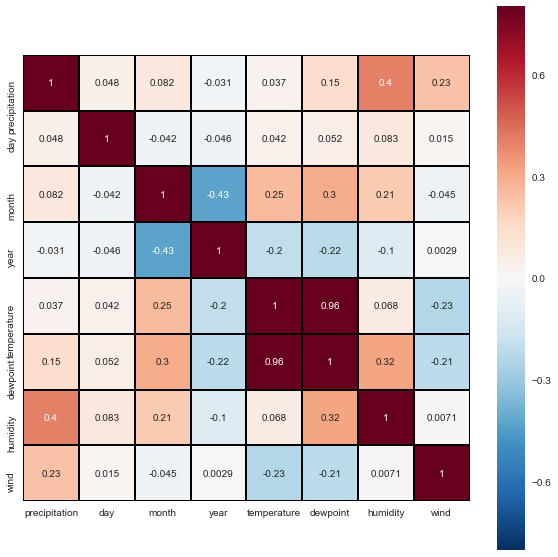

In [21]:
df_correlation_matrix = df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(df_correlation_matrix, vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)

Since the outcome to be precipitaion.   
We will have to look at the features that have a strong correlation with precipitation and choose those ones to use.   

Looking at the correlation matrix above,   
the only 3 that seem to have a strong correlation with precipitaion are temperature, humidity and wind.   


The correlation between temperature and and precipitation is 0.037.    
The correlation between dewpoint and precipitation is 0.15.    
The correlation between humidity and precipitation is 0.4.   
The correlation between wind and and precipitation is 0.23. 

That is because dewpoint is a fuction of humidity  and temperature.

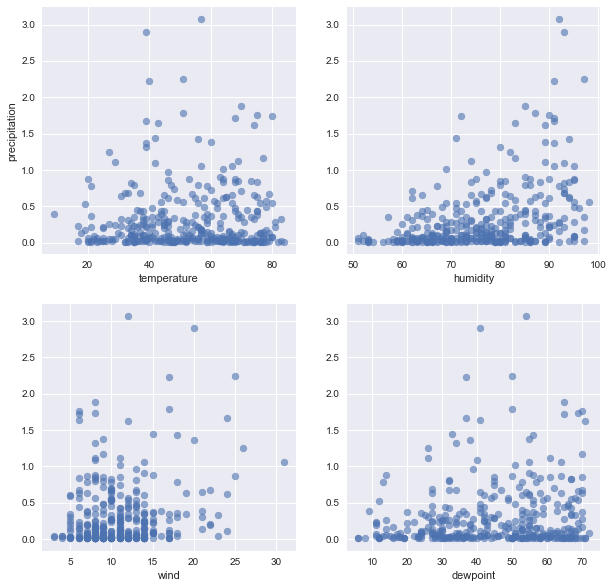

In [22]:
# Look at the scatter plot for precipitation related to dewpoint, humidity and wind..


plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.scatter(df['temperature'], df['precipitation'], alpha=0.6)
plt.xlabel('temperature')
plt.ylabel('precipitation')

plt.subplot(2, 2, 2)

plt.scatter(df['humidity'], df['precipitation'], alpha=0.6)
plt.xlabel('humidity')

plt.subplot(2, 2, 3)

plt.scatter(df['wind'], df['precipitation'], alpha=0.6)
plt.xlabel('wind')


plt.subplot(2, 2, 4)

plt.scatter(df['dewpoint'], df['precipitation'], alpha=0.6)
plt.xlabel('dewpoint')

plt.show()


The __class imbalance__ in the data is now removed     
hopefully with this we will have an improvment in our prediction.   

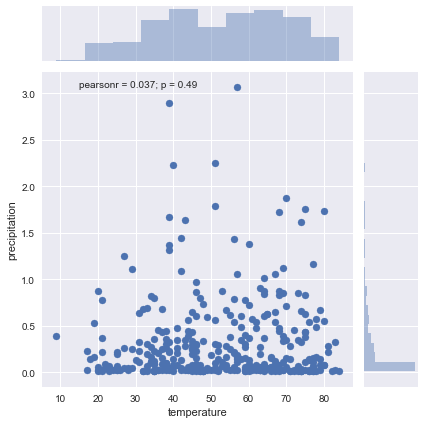

In [23]:
plt.figure(figsize=(5, 5))
sns.jointplot(x='temperature',y='precipitation',data=df)
plt.show()

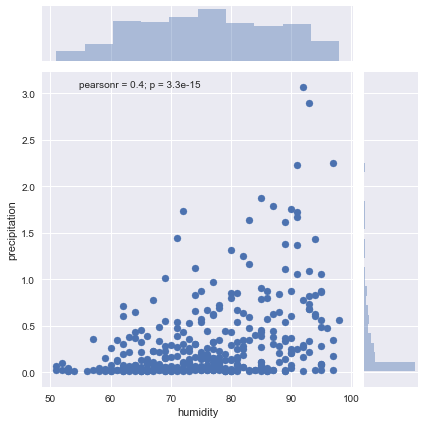

In [24]:
plt.figure(figsize=(5, 5))
sns.jointplot(x='humidity',y='precipitation',data=df)
plt.show()

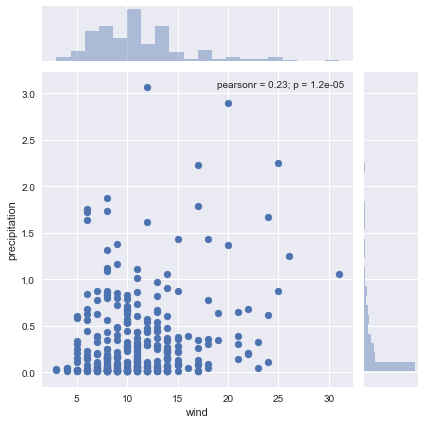

In [25]:
plt.figure(figsize=(5, 5))
sns.jointplot(x='wind',y='precipitation',data=df)
plt.show()

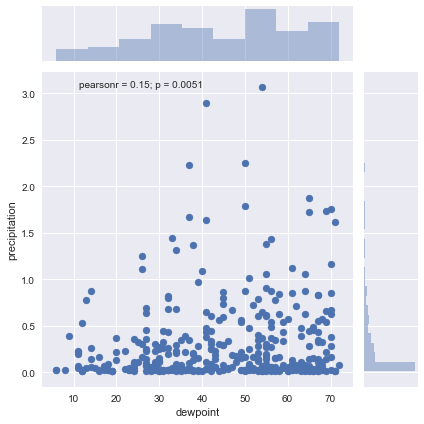

In [26]:
plt.figure(figsize=(5, 5))
sns.jointplot(x='dewpoint',y='precipitation',data=df)
plt.show()

### KNN REGRESSION

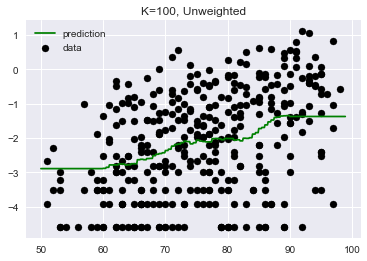

Unweighted Accuracy: 0.13 (+/- 0.07)


In [27]:
# Build our model with X = df['humidity'] and Y = df['precipitation'].
knn = neighbors.KNeighborsRegressor(n_neighbors=100)
X = pd.DataFrame(df.humidity)
Y = np.log(df.precipitation)
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(50, 99, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)


plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=100, Unweighted')
plt.show()



score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

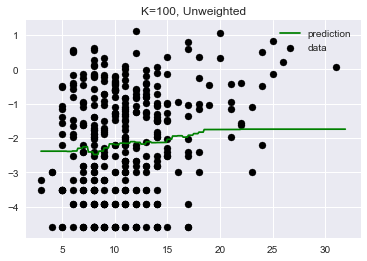

Unweighted Accuracy: 0.01 (+/- 0.03)


In [28]:
# Build our model with X = df['wind'] and Y = df['precipitation'].
knn = neighbors.KNeighborsRegressor(n_neighbors=100)
X = pd.DataFrame(df.wind)
Y = np.log(df.precipitation)
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(3, 32, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)


plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=100, Unweighted')
plt.show()



score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

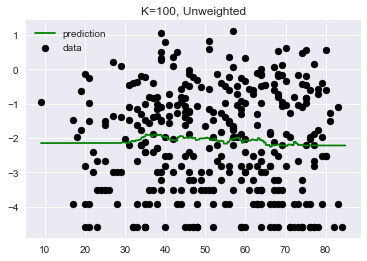

Unweighted Accuracy: -0.03 (+/- 0.02)


In [29]:
# Build our model with X = df['temperature'] and Y = df['precipitation'].
knn = neighbors.KNeighborsRegressor(n_neighbors=100)
X = pd.DataFrame(df.temperature)
Y = np.log(df.precipitation)
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(9, 85, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)


plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=100, Unweighted')
plt.show()



score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

#### KNN REGRESSION using X1 = df[['temperature','humidity','wind']]

In [30]:
# Build our model without weights
knn1 = neighbors.KNeighborsRegressor(n_neighbors=100)
X1 = df[['temperature','humidity','wind']]
Y1 = np.log(df['precipitation'])
knn1.fit(X1, Y1)

print('\nR-squared:')
print(knn1.score(X1, Y1))

score1 = cross_val_score(knn1, X1, Y1, cv=5)
print("\nUnweighted Accuracy: %0.2f (+/- %0.2f)" % (score1.mean(), score1.std() * 2))

print('\nEach Cross Validated R^2 Score: \n', score1)


R-squared:
0.130968942385

Unweighted Accuracy: 0.11 (+/- 0.04)

Each Cross Validated R^2 Score: 
 [ 0.13012148  0.12141264  0.11682805  0.08226792  0.09579786]


The R-squared is not good.   
But for the cross validation we can see that the data is predicting well on itself.  

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


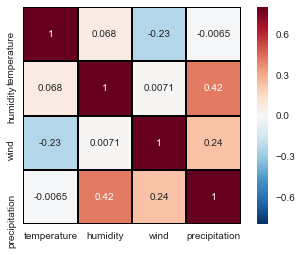

In [31]:
X1['precipitation'] = Y1 

X1_correlation_matrix = X1.corr()
sns.heatmap(X1_correlation_matrix, vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)

The correlation between temperature and log(precipitation) is -0.0065.      
The correlation between humidity and log(precipitation) is 0.42.   
The correlation between wind  and log(precipitation) is 0.24. 

#### KNN Regression with weight

In [32]:
# Run the same model, this time with weights.
knn_w1 = neighbors.KNeighborsRegressor(n_neighbors=100, weights='distance')
X1_w = df[['temperature','humidity','wind']]
Y1 = np.log(df['precipitation'])
knn_w1.fit(X1_w, Y1)

print('\nR-squared:')
print(knn_w1.score(X1_w, Y1))

score_w1 = cross_val_score(knn_w1, X1_w, Y1, cv=5)
print("\nWeighted Accuracy: %0.2f (+/- %0.2f)" % (score_w1.mean(), score_w1.std() * 2))

print('\nEach Cross Validated R^2 Score: \n', score_w1)


R-squared:
0.999190296722

Weighted Accuracy: 0.12 (+/- 0.04)

Each Cross Validated R^2 Score: 
 [ 0.14984473  0.12560822  0.1391813   0.09388637  0.11512439]


The R-squared is good.   
But for the cross validation we can see that the data is predicting well on itself.  

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


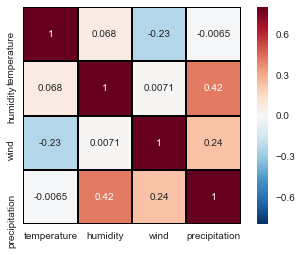

In [36]:
X1_w['precipitation'] = Y1
X1_w_correlation_matrix = X1_w.corr()
sns.heatmap(X1_correlation_matrix, vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)

The correlation between temperature and log(precipitation) is -0.0065.      
The correlation between humidity and log(precipitation) is 0.42.   
The correlation between wind  and log(precipitation) is 0.24. 

### OLS REGRESSION 

In [34]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = np.log(df['precipitation'].values.reshape(-1, 1))
X = df[['temperature','humidity','wind']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))



print('\nEach Cross Validated R^2 Score: \n',cross_val_score(regr, Y, X, cv=5))


Coefficients: 
 [[ 0.00186362  0.05643893  0.08419071]]

Intercept: 
 [-7.43511005]

R-squared:
0.22684652685

Each Cross Validated R^2 Score: 
 [-0.05417047 -0.03803823 -0.31682921 -0.21579161  0.01311589]


The R-squared is not good.   
But for the cross validation we can see that the data is not predicting well on itself.  

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


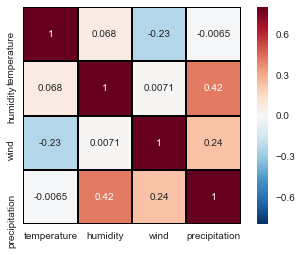

In [35]:
X['precipitation'] = Y
X_correlation_matrix = X.corr()
sns.heatmap(X_correlation_matrix, vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)

The correlation between temperature and log(precipitation) is -0.0065.      
The correlation between humidity and log(precipitation) is 0.42.   
The correlation between wind  and log(precipitation) is 0.24. 